# 3.1 Keras_APIs

## Model on Iris Dataset

#### importing the libraries

In [3]:
import pandas as pd
import requests
import tensorflow as tf

#### Saving the data

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
link = requests.get(url)

with open("iris.csv", "wb") as file:
    file.write(link.content)

#### Reading the Data

In [5]:
iris_df = pd.read_csv("iris.csv", header=None)

iris_df.columns = ['sepal_length', 'sepal_width', 'petal_width', 'petal_length', 'label']

iris_df["label"] = iris_df["label"].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Shuffle the data
iris_df = iris_df.sample(frac=1.0, random_state=4321)

# Normalize the features by subtracting the mean
x = iris_df[["sepal_length", "sepal_width", "petal_width", "petal_length"]]
x = x - x.mean(axis=0)

# Converting integer labels to one-hot vectors
y = tf.one_hot(iris_df["label"], depth=3)

print(iris_df.head())

print("x : ", x)
print("y : ", y)

     sepal_length  sepal_width  petal_width  petal_length  label
31            5.4          3.4          1.5           0.4      0
23            5.1          3.3          1.7           0.5      0
70            5.9          3.2          4.8           1.8      1
100           6.3          3.3          6.0           2.5      2
44            5.1          3.8          1.9           0.4      0
x :       sepal_length  sepal_width  petal_width  petal_length
31      -0.443333        0.346    -2.258667     -0.798667
23      -0.743333        0.246    -2.058667     -0.698667
70       0.056667        0.146     1.041333      0.601333
100      0.456667        0.246     2.241333      1.301333
44      -0.743333        0.746    -1.858667     -0.798667
..            ...          ...          ...           ...
113     -0.143333       -0.554     1.241333      0.801333
91       0.256667       -0.054     0.841333      0.201333
146      0.456667       -0.554     1.241333      0.701333
124      0.856667        

## Sequential API

The Sequential API is the easiest to use. It can be used to define a simple model that has one input, one output and a sequence of intermediate layers in the middle.

* A `Dense` layer with 32 nodes and relu activation
* A `Dense` layer with 16 nodes and relu activation
* A `Dense` layer with 3 nodes and softmax activation


In [6]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K

K.clear_session()

model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

# print the summary
model.summary()

# COMPILE
model.compile( loss="categorical_crossentropy", optimizer="adam", metrics=['acc'])

# fit the model
model.fit(x, y, batch_size=64, epochs=25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 739 (2.89 KB)
Trainable params: 739 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
3/3 [==============================] - 0s 3ms/step - loss: 1.1669 - acc: 0.2467
Epoch 2/25
3/3 [==============================] - 0s 1ms/step - loss: 1.1060 - acc: 0.3200
Epoch 3/25
3/3 [==============================] - 0s 2ms/step - loss: 1.0522 - acc: 0.3467
Epoch 4/25
3/3 [=

## Functional API

In [7]:
# setting the random seed
import numpy as np
import random

def fix_random_seed(val):
    np.random.seed(seed=val)
    tf.random.set_seed(val)
    random.seed(val)

fix_random_seed(4231)

In [8]:
# function model which takes two inputs
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

K.clear_session()

first = Input(shape=(4,))
second = Input(shape=(2,))

firstout = Dense( 16, activation='relu')(first)
secondout = Dense(16, activation='relu')(second)

combinedout = Concatenate(axis=1)([firstout, secondout])

firsthidden = Dense(16, activation='relu')(combinedout)
out = Dense(3, activation='softmax')(combinedout)

model = Model(inputs=[first, second], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 16)                   80        ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 16)                   48        ['input_2[0][0]']             
                                                                                              

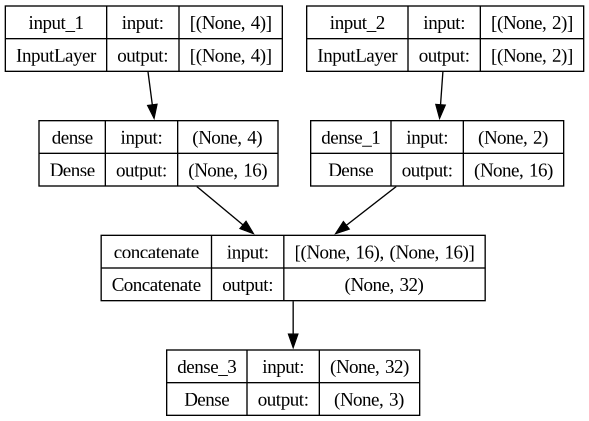

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model,to_file="model-1.png", show_shapes=True)


In [11]:
# getting second input
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2, random_state=4321)
x_pca = pca_model.fit_transform(x)

In [12]:
model.fit([x, x_pca], y, batch_size=64, epochs=25)

Epoch 1/25
3/3 [==============================] - 0s 2ms/step - loss: 0.9520 - acc: 0.4667
Epoch 2/25
3/3 [==============================] - 0s 1ms/step - loss: 0.9135 - acc: 0.4933
Epoch 3/25
3/3 [==============================] - 0s 1ms/step - loss: 0.8773 - acc: 0.5533
Epoch 4/25
3/3 [==============================] - 0s 988us/step - loss: 0.8434 - acc: 0.6133
Epoch 5/25
3/3 [==============================] - 0s 1ms/step - loss: 0.8130 - acc: 0.6600
Epoch 6/25
3/3 [==============================] - 0s 1ms/step - loss: 0.7835 - acc: 0.7133
Epoch 7/25
3/3 [==============================] - 0s 1ms/step - loss: 0.7563 - acc: 0.7200
Epoch 8/25
3/3 [==============================] - 0s 1ms/step - loss: 0.7313 - acc: 0.7533
Epoch 9/25
3/3 [==============================] - 0s 1ms/step - loss: 0.7090 - acc: 0.7667
Epoch 10/25
3/3 [==============================] - 0s 1ms/step - loss: 0.6870 - acc: 0.7733
Epoch 11/25
3/3 [==============================] - 0s 1ms/step - loss: 0.6672 - acc: 0.

## Inheriting API

In [14]:
from tensorflow.keras import layers

# defining the subclass 

class MulBiasDense(layers.Layer):
    """ The layer with the new multiplicative bias we want to test """
    
    def __init__(self, units=32, activation=None):
        """ Defines various hyperparameters of the layer"""
        
        super(MulBiasDense, self).__init__()
        self.units = units
        self.activation = activation
    
    def build(self, input_shape):
        """ Defines the parameters (weights and biases)"""
        
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b_mul = self.add_weight(shape=(self.units,),
                                     initializer='glorot_uniform',
                                     trainable=True)

    def call(self, inputs):
        """ Defines the computations that happen in the layer"""
        
        out = (tf.matmul(inputs, self.w) + self.b) * self.b_mul
        return layers.Activation(self.activation)(out)
        


In [18]:
# implementation

from keras.layers import Dense, Input, Concatenate
from keras.models import Model
import tensorflow as tf
import keras.backend as K

K.clear_session()

inp = Input(shape=(4,))
first = MulBiasDense(units=32, activation='relu')(inp)
second = MulBiasDense(units=16, activation='relu')(first)
out = Dense(3, activation='softmax')(second)

model = Model(inputs=inp, outputs=out)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(x, y, batch_size=64, epochs=24)

Epoch 1/24
3/3 [==============================] - 0s 2ms/step - loss: 1.0991 - acc: 0.3333
Epoch 2/24
3/3 [==============================] - 0s 1ms/step - loss: 1.0977 - acc: 0.3333
Epoch 3/24
3/3 [==============================] - 0s 1ms/step - loss: 1.0963 - acc: 0.3333
Epoch 4/24
3/3 [==============================] - 0s 1ms/step - loss: 1.0951 - acc: 0.3333
Epoch 5/24
3/3 [==============================] - 0s 1ms/step - loss: 1.0938 - acc: 0.3333
Epoch 6/24
3/3 [==============================] - 0s 1ms/step - loss: 1.0925 - acc: 0.3333
Epoch 7/24
3/3 [==============================] - 0s 1ms/step - loss: 1.0911 - acc: 0.3333
Epoch 8/24
3/3 [==============================] - 0s 1ms/step - loss: 1.0897 - acc: 0.3333
Epoch 9/24
3/3 [==============================] - 0s 1ms/step - loss: 1.0882 - acc: 0.3333
Epoch 10/24
3/3 [==============================] - 0s 1ms/step - loss: 1.0865 - acc: 0.3333
Epoch 11/24
3/3 [==============================] - 0s 1ms/step - loss: 1.0847 - acc: 0.33